### Import libs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import math
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Import data

In [2]:
rand_state = 1000

In [3]:
df_southwest = pd.read_excel(r'/Users/dilianaserafimova/Desktop/df_southwest_clean.xlsx')

In [4]:
df_southwest = df_southwest.set_index(['date'])

### Scaling the features

In [5]:
scale = StandardScaler()
df_sc = scale.fit_transform(df_southwest)
df_sc = pd.DataFrame(df_sc, columns=df_southwest.columns)

In [6]:
df_sc.head()

,pax_count,revenue,seat_miles,load_factor,flights
0,-1.739212,-1.664980,-1.463180,-2.732325,-3.052372
1,-1.790451,-1.711159,-1.719286,-2.106567,-0.675040
2,-1.398577,-1.421433,-1.448066,-1.427850,-0.368659
3,-1.477158,-1.473138,-1.497731,-1.533768,-0.431242
4,-1.313847,-1.367160,-1.438343,-1.163052,-0.382170


### Defining the variables and splitting the data

In [7]:
y = df_sc['pax_count']
X = df_sc.drop('pax_count', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state, shuffle=False)

###  Fit the model

In [8]:
SVM_regression = SVR()
SVM_regression.fit(X_train, y_train)

SVR()

### Make a prediction 

In [9]:
test_pred = SVM_regression.predict(X_test)

In [10]:
predictions = pd.DataFrame({ 'y_test':y_test,'y_pred':test_pred})
predictions.head()

,y_test,y_pred
163,1.263201,1.308354
164,1.014139,0.998410
165,1.301319,1.243367
166,1.263506,1.226294
167,1.233111,1.136148


### Plot the model

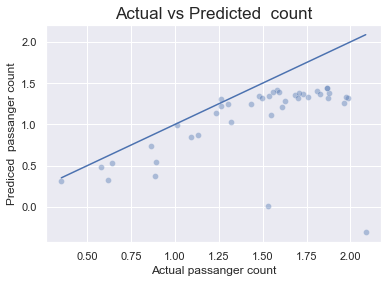

In [11]:
sns.scatterplot(x=y_test, y=test_pred, alpha=0.4)
sns.lineplot(y_test, y_test)

plt.xlabel('Actual passanger count', fontsize=12)
plt.ylabel('Prediced  passanger count', fontsize=12)
plt.title('Actual vs Predicted  count', fontsize=17)
plt.show()

### Evaluating the model on test dataset

In [12]:
SVM_regression.score(X_test, y_test)

-0.6976349157299939

In [13]:
RMSE = math.sqrt(mean_squared_error(y_test, test_pred))
print("Test Score: %.2f RMSE" % (RMSE))

Test Score: 0.56 RMSE


---

### Defining the hyperparameters 

In [14]:
my_param_grid = {'C': [1,10,100], 'gamma': [1,0.1,0.01], 'kernel': ['rbf']} 

In [15]:
GridSearchCV(estimator=SVR(),param_grid= my_param_grid, refit = True, verbose=3, cv=5 )

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10, 100], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=3)

In [16]:
grid = GridSearchCV(estimator=SVR(),param_grid= my_param_grid, refit = True, verbose=2, cv=5 )

### Fit the model with the optimized parameters

In [17]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.01,

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10, 100], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=2)

In [18]:
grid.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [19]:
grid.best_estimator_

SVR(C=100, gamma=0.01)

### Predict the optimized model

In [20]:
test_pred_optimized = grid.predict(X_test)

In [21]:
predictions['y_pred_optimized'] = test_pred_optimized
predictions.head()

,y_test,y_pred,y_pred_optimized
163,1.263201,1.308354,1.307258
164,1.014139,0.998410,0.973635
165,1.301319,1.243367,1.194928
166,1.263506,1.226294,1.181266
167,1.233111,1.136148,1.210767


### Plot

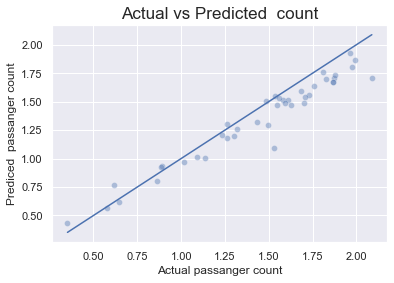

In [22]:
sns.scatterplot(x=y_test, y=test_pred_optimized, alpha=0.4)
sns.lineplot(y_test, y_test)

plt.xlabel('Actual passanger count', fontsize=12)
plt.ylabel('Prediced  passanger count', fontsize=12)
plt.title('Actual vs Predicted  count', fontsize=17)
plt.show()

### Evaluate

In [23]:
grid.score(X_test, y_test)

0.8872873828872523

In [24]:
RMSE_opt = math.sqrt(mean_squared_error(y_test, test_pred_optimized))
print("Test Score: %.2f RMSE" % (RMSE_opt))

Test Score: 0.14 RMSE
